# **GIVE ME SOME CREDIT**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/GiveMeSomeCredit/Data Dictionary.xls
/kaggle/input/GiveMeSomeCredit/cs-training.csv
/kaggle/input/GiveMeSomeCredit/sampleEntry.csv
/kaggle/input/GiveMeSomeCredit/cs-test.csv
/kaggle/input/give-me-some-credit-william-irawan/__results__.html
/kaggle/input/give-me-some-credit-william-irawan/submission_file.csv
/kaggle/input/give-me-some-credit-william-irawan/__resultx__.html
/kaggle/input/give-me-some-credit-william-irawan/__notebook__.ipynb
/kaggle/input/give-me-some-credit-william-irawan/__output__.json
/kaggle/input/give-me-some-credit-william-irawan/custom.css
/kaggle/input/give-me-some-credit-william-irawan/__results___files/__results___35_0.png
/kaggle/input/give-me-some-credit-william-irawan/__results___files/__results___36_0.png
/kaggle/input/give-me-some-credit-william-irawan/__results___files/__results___38_2.png
/kaggle/input/give-me-some-credit-william-irawan/__results___files/__results___27_1.png
/kaggle/input/give-me-some-credit-william-irawan/__results___files

**i. Menginstall tool yang digunakan untuk membaca file excel .xls**

In [2]:
!pip install xlrd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 3.3 MB/s eta 0:00:00


In [3]:
import matplotlib.pyplot as ml
import seaborn as sbr
from scipy import stats

**ii. Menginput Data Ke Variabel**

In [4]:
train_df = pd.read_csv('/kaggle/input/givemesomecredit/cs-training.csv')
data_description = pd.read_excel('/kaggle/input/givemesomecredit/Data Dictionary.xls')
test_df = pd.read_csv('/kaggle/input/givemesomecredit/cs-test.csv')
submission = pd.read_csv('/kaggle/input/givemesomecredit/sampleEntry.csv')


# **A. Exploratory Data Analysis**

**i. Mengecek Dataset**

In [5]:
test_df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [6]:
train_df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


**ii. Mencetak Atribut yang Terdapat Pada Dataset**

In [7]:
print(test_df.shape)
print(train_df.shape)

(101503, 12)
(150000, 12)


In [8]:
print(test_df.columns)

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')


In [9]:
print(train_df.columns)

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')


**iii. Mengetahui Nilai dari Isi Dataset**

In [10]:
train_df.nunique()

Unnamed: 0                              150000
SeriousDlqin2yrs                             2
RevolvingUtilizationOfUnsecuredLines    125728
age                                         86
NumberOfTime30-59DaysPastDueNotWorse        16
DebtRatio                               114194
MonthlyIncome                            13594
NumberOfOpenCreditLinesAndLoans             58
NumberOfTimes90DaysLate                     19
NumberRealEstateLoansOrLines                28
NumberOfTime60-89DaysPastDueNotWorse        13
NumberOfDependents                          13
dtype: int64

In [11]:
test_df.nunique()

Unnamed: 0                              101503
SeriousDlqin2yrs                             0
RevolvingUtilizationOfUnsecuredLines     85716
age                                         82
NumberOfTime30-59DaysPastDueNotWorse        16
DebtRatio                                79878
MonthlyIncome                            11976
NumberOfOpenCreditLinesAndLoans             56
NumberOfTimes90DaysLate                     18
NumberRealEstateLoansOrLines                24
NumberOfTime60-89DaysPastDueNotWorse        12
NumberOfDependents                          13
dtype: int64

**iv. Mengetahui Informasi dari Isi Dataset**

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            101503 non-null  int64  
 1   SeriousDlqin2yrs                      0 non-null       float64
 2   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 3   age                                   101503 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 5   DebtRatio                             101503 non-null  float64
 6   MonthlyIncome                         81400 non-null   float64
 7   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 8   NumberOfTimes90DaysLate               101503 non-null  int64  
 9   NumberRealEstateLoansOrLines          101503 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 11  

**v. Mengecek Isi Data yang Bernilai NULL**

In [14]:
pd.DataFrame({'count':train_df.isnull().sum().values, 'ratio' : train_df.isnull().mean() * 100})

,count,ratio
Unnamed: 0,0,0.000000
SeriousDlqin2yrs,0,0.000000
RevolvingUtilizationOfUnsecuredLines,0,0.000000
age,0,0.000000
NumberOfTime30-59DaysPastDueNotWorse,0,0.000000
DebtRatio,0,0.000000
MonthlyIncome,29731,19.820667
NumberOfOpenCreditLinesAndLoans,0,0.000000
NumberOfTimes90DaysLate,0,0.000000
NumberRealEstateLoansOrLines,0,0.000000


In [15]:
pd.DataFrame({'count':test_df.isnull().sum().values, 'ratio' : train_df.isnull().mean() * 100})

,count,ratio
Unnamed: 0,0,0.000000
SeriousDlqin2yrs,101503,0.000000
RevolvingUtilizationOfUnsecuredLines,0,0.000000
age,0,0.000000
NumberOfTime30-59DaysPastDueNotWorse,0,0.000000
DebtRatio,0,0.000000
MonthlyIncome,20103,19.820667
NumberOfOpenCreditLinesAndLoans,0,0.000000
NumberOfTimes90DaysLate,0,0.000000
NumberRealEstateLoansOrLines,0,0.000000


**vi. Membuat Diagram SeriousDlqin2yrs**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'SeriousDlqin2yrs'}, ylabel='SeriousDlqin2yrs'>

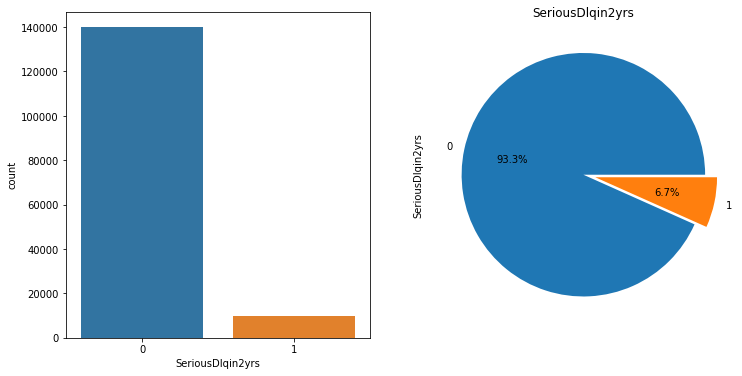

In [16]:
train_df['SeriousDlqin2yrs'].value_counts()/train_df.shape[0]
target_count = train_df["SeriousDlqin2yrs"].value_counts()
fig, axes = ml.subplots(1, 2, figsize=(12, 6))
sbr.countplot("SeriousDlqin2yrs", data=train_df, ax=axes[0])
axes[1].set_title("SeriousDlqin2yrs")
target_count.plot.pie(explode=[0, 0.1], autopct='%1.1f%%',ax=axes[1])

**vii. Membuat Heatmap Berdasarkan Atribut yang Saling Berkaitan Satu Sama Lain**

<AxesSubplot:>

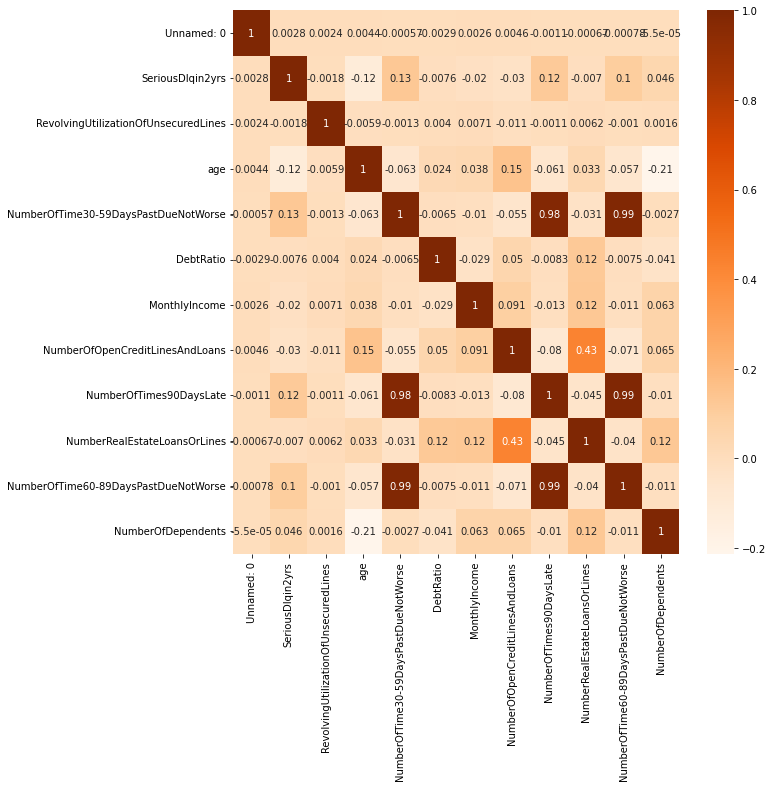

In [17]:
fig, ax = ml.subplots(figsize=(10, 10))
sbr.heatmap(train_df.corr(),  annot=True, cmap='Oranges')

**viii. Membuat Diagram Korelasi Antara Usia Peminjam dengan Total Kredit**

In [18]:
usia_bin = [x for x in range (0,100,5)]

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0740e+03,
        6.7460e+03, 1.0419e+04, 1.2764e+04, 1.5799e+04, 1.8578e+04,
        1.8198e+04, 1.7103e+04, 1.7125e+04, 1.1780e+04, 8.0430e+03,
        5.5580e+03, 3.2890e+03, 1.8360e+03, 6.2400e+02]),
 array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80,
        85, 90, 95]),
 <BarContainer object of 19 artists>)

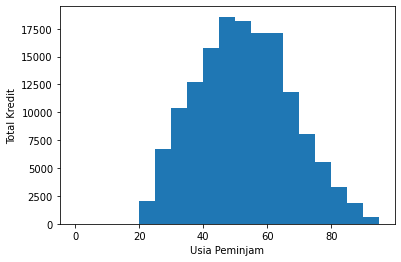

In [19]:
ml.xlabel('Usia Peminjam')

ml.ylabel('Total Kredit')

ml.hist(train_df["age"], bins = usia_bin)



# **B. Feature Engineering**

**i. Menghapus Outlier**

In [20]:
def hapus_outlier(df, atr_name, max_scale_dari_std):
    
    f = df[atr_name]
    std = f.std()
    jarak_dari_mean = f - f.mean()
    kondisi = np.abs(jarak_dari_mean) >= max_scale_dari_std * std
    df.loc[kondisi, atr_name] = f.mean()
    
    return df

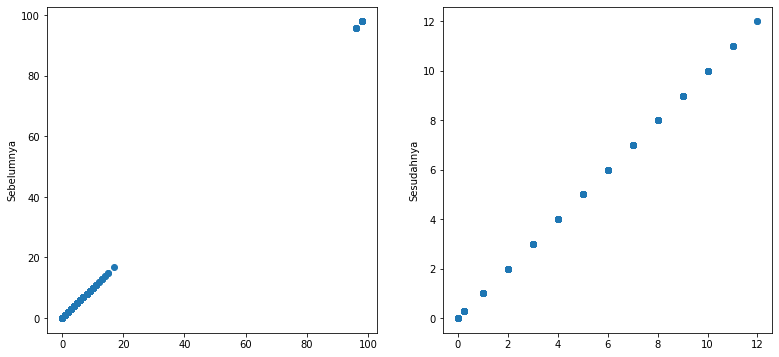

In [21]:
pertama_atr = train_df['NumberOfTimes90DaysLate']

fig, axes = ml.subplots(1, 2, figsize=(13, 6))

axes[0].scatter(pertama_atr, pertama_atr)
axes[0].set_ylabel("Sebelumnya")

train_df = hapus_outlier(train_df, "NumberOfTimes90DaysLate", 3)
pertama_atr = train_df["NumberOfTimes90DaysLate"]

axes[1].scatter(pertama_atr, pertama_atr)
axes[1].set_ylabel("Sesudahnya")

ml.show()

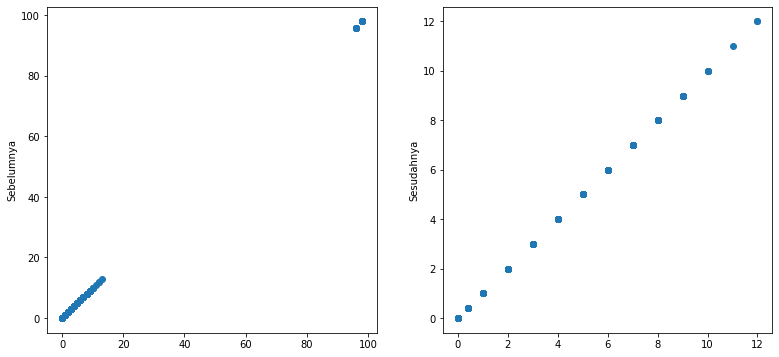

In [22]:
kedua_atr = train_df['NumberOfTime30-59DaysPastDueNotWorse']

fig, axes = ml.subplots(1, 2, figsize=(13, 6))

axes[0].scatter(kedua_atr, kedua_atr)
axes[0].set_ylabel("Sebelumnya")

train_df = hapus_outlier(train_df, "NumberOfTime30-59DaysPastDueNotWorse", 3)
kedua_atr = train_df["NumberOfTime30-59DaysPastDueNotWorse"]

axes[1].scatter(kedua_atr, kedua_atr)
axes[1].set_ylabel("Sesudahnya")

ml.show()

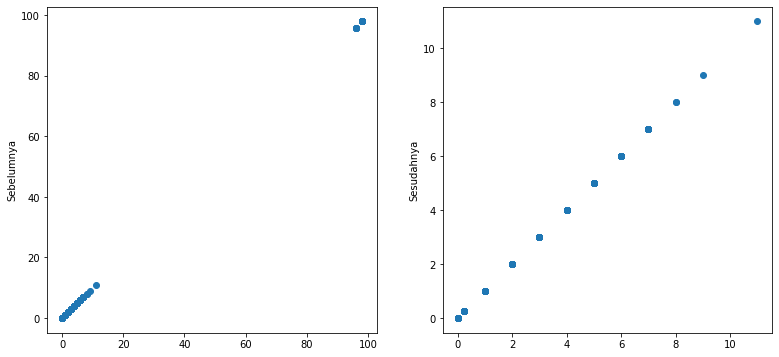

In [23]:
ketiga_atr = train_df['NumberOfTime60-89DaysPastDueNotWorse']

fig, axes = ml.subplots(1, 2, figsize=(13, 6))

axes[0].scatter(ketiga_atr, ketiga_atr)
axes[0].set_ylabel("Sebelumnya")

train_df = hapus_outlier(train_df, "NumberOfTime60-89DaysPastDueNotWorse", 3)
ketiga_atr = train_df["NumberOfTime60-89DaysPastDueNotWorse"]

axes[1].scatter(ketiga_atr, ketiga_atr)
axes[1].set_ylabel("Sesudahnya")

ml.show()

**ii. Mengecek Kemiringan Data**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NumberOfDependents', ylabel='Density'>

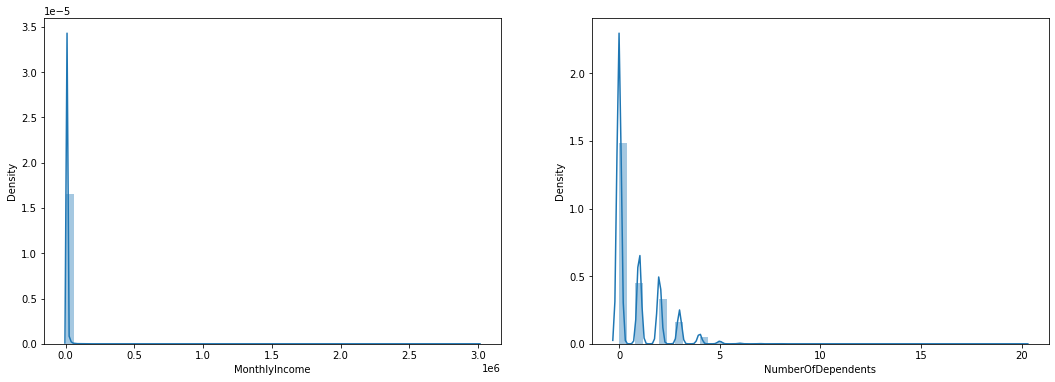

In [24]:
fig, ax = ml.subplots(figsize=(18, 6), ncols=2)

sbr.distplot(train_df["MonthlyIncome"], ax=ax[0])

sbr.distplot(train_df["NumberOfDependents"], ax=ax[1])


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NumberOfDependents', ylabel='Density'>

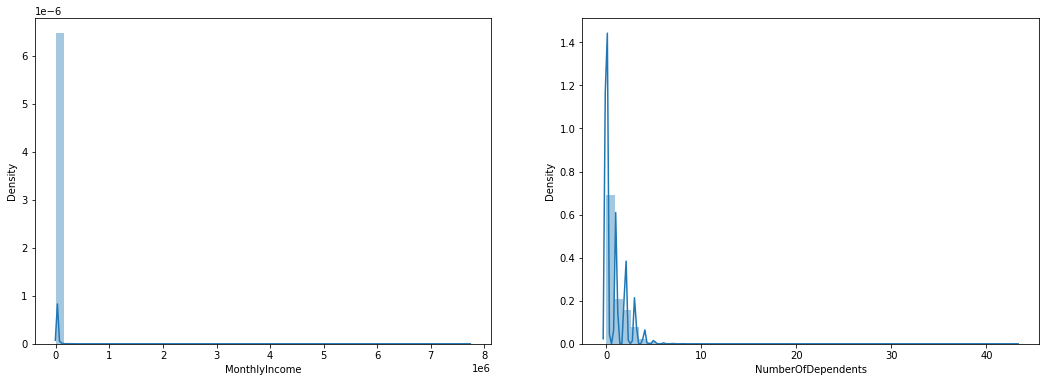

In [25]:
fig, ax = ml.subplots(figsize=(18, 6), ncols=2)

sbr.distplot(test_df["MonthlyIncome"], ax=ax[0])

sbr.distplot(test_df["NumberOfDependents"], ax=ax[1]) 


**iii. Mencari Rata - Rata, Nilai Tengah, serta Modus**

In [26]:
number_of_dependents_train = train_df["NumberOfDependents"]

number_of_dependents_train_median = number_of_dependents_train.median()

number_of_dependents_train_mean = number_of_dependents_train.mean()

number_of_dependents_train_mode = number_of_dependents_train.mode().mean()

In [27]:
monthly_income_train = train_df["MonthlyIncome"]

monthly_income_train_median = monthly_income_train.median()

monthly_income_train_mean = monthly_income_train.mean()

monthly_income_train_mode = monthly_income_train.mode().mean()

In [28]:
print("Detail Number Of Dependents")
print("------------------------------------------")

print("Median Nilai Tengah Number of Dependents:", number_of_dependents_train_median)
print("Rata - rata Number of Dependents:", number_of_dependents_train_mean)
print("Modus Rata - rata Number of Dependents:", number_of_dependents_train_mode)

print("                                          ")
print("                                          ")

print("Detail Monthly Income")
print("------------------------------------------")

print("Median Nilai Tengah Monthly Income:", monthly_income_train_median)
print("Rata - rata Monthly Income:", monthly_income_train_mean)
print("Modus Rata - rata Monthly Income:", monthly_income_train_mode)

Detail Number Of Dependents
------------------------------------------
Median Nilai Tengah Number of Dependents: 0.0
Rata - rata Number of Dependents: 0.7572222678605657
Modus Rata - rata Number of Dependents: 0.0
                                          
                                          
Detail Monthly Income
------------------------------------------
Median Nilai Tengah Monthly Income: 5400.0
Rata - rata Monthly Income: 6670.221237392844
Modus Rata - rata Monthly Income: 5000.0


In [29]:
number_of_dependents_test = test_df["NumberOfDependents"]

number_of_dependents_test_median = number_of_dependents_test.median()

number_of_dependents_test_mean = number_of_dependents_test.mean()

number_of_dependents_test_mode = number_of_dependents_test.mode().mean()

In [30]:
monthly_income_test = test_df["MonthlyIncome"]

monthly_income_test_median = monthly_income_test.median()

monthly_income_test_mean = monthly_income_test.mean()

monthly_income_test_mode = monthly_income_test.mode().mean()

In [31]:
print("Detail Number Of Dependents")
print("------------------------------------------")

print("Median Nilai Tengah Number of Dependents:", number_of_dependents_test_median)
print("Rata - rata Number of Dependents:", number_of_dependents_test_mean)
print("Modus Rata - rata Number of Dependents:", number_of_dependents_test_mode)

print("                                          ")
print("                                          ")

print("Detail Monthly Income")
print("------------------------------------------")

print("Median Nilai Tengah Monthly Income:", monthly_income_test_median)
print("Rata - rata Monthly Income:", monthly_income_test_mean)
print("Modus Rata - rata Monthly Income:", monthly_income_test_mode)

Detail Number Of Dependents
------------------------------------------
Median Nilai Tengah Number of Dependents: 0.0
Rata - rata Number of Dependents: 0.7690463909705998
Modus Rata - rata Number of Dependents: 0.0
                                          
                                          
Detail Monthly Income
------------------------------------------
Median Nilai Tengah Monthly Income: 5400.0
Rata - rata Monthly Income: 6855.0355896805895
Modus Rata - rata Monthly Income: 5000.0


**iv. Mengisi Nilai NULL**

In [32]:
train_df['NumberOfDependents'].fillna(number_of_dependents_train_mode, inplace=True)
test_df['NumberOfDependents'].fillna(number_of_dependents_test_mode, inplace=True)

train_df['MonthlyIncome'].fillna(monthly_income_train_mode, inplace=True)
test_df['MonthlyIncome'].fillna(monthly_income_test_mode, inplace=True)

In [33]:
train_df.isnull().sum()

Unnamed: 0                              0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [34]:
test_df.isnull().sum()

Unnamed: 0                                   0
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                                0
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                           0
dtype: int64

# **C. Model Iterations**

**i. Membuat Data Testing**

In [35]:
train_df.info()
print("")
print("_________________________________________________________________")
print("")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  float64
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         150000 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  float64
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  float64
 11  

In [36]:
x = train_df.drop("SeriousDlqin2yrs", axis = 1)
y = train_df["SeriousDlqin2yrs"]

In [37]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

**ii. Membuat Model Random Forest**

In [38]:
from sklearn.ensemble import RandomForestClassifier
parameter = {'n_estimators': [9,27,36],'max_depth': [3,7,9],'min_samples_leaf': [2, 4]}
ranforestclass = RandomForestClassifier()

In [39]:
from sklearn.model_selection import RandomizedSearchCV
ranforestsrc = RandomizedSearchCV(ranforestclass, param_distributions=parameter, cv=5)

In [40]:
ranforestsrc.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [3, 7, 9],
                                        'min_samples_leaf': [2, 4],
                                        'n_estimators': [9, 27, 36]})

In [41]:
best_estimator_ranforestclass = ranforestsrc.best_estimator_
best_estimator_ranforestclass

RandomForestClassifier(max_depth=7, min_samples_leaf=4, n_estimators=27)

In [42]:
print("Akurasi Training = {:.2f}".format(ranforestsrc.score(x_train, y_train) * 100))
print("Akurasi Validasi = {:.2f}".format(ranforestsrc.score(x_test, y_test) * 100))

Akurasi Training = 93.90
Akurasi Validasi = 93.76


**iii. Mencari Regresi Logistik**

In [43]:
from lightgbm import LGBMClassifier
parameter = {'n_estimators': [100, 250],'max_depth': [8, 24],'num_leaves': [25, 50],'first_metric_only': [True]}
lgb = LGBMClassifier()

In [44]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(estimator=lgb,param_grid=parameter,cv=5,)

In [45]:
from sklearn.linear_model import LogisticRegression
parameter = {'solver': ['newton-cg', 'lbfgs'],'penalty': ['l2', 'elasticnet'],'C': [ 1e-1, 1],}
lr = LogisticRegression()

In [46]:
%%capture --no-display
gs_lr = GridSearchCV(estimator=lr,param_grid=parameter,cv=5)
lr_fit = gs_lr.fit(x_train, y_train)

In [47]:
print(lr_fit.best_score_)
print(lr_fit.best_params_)

0.9357619047619048
{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


In [48]:
print("Akurasi Training = {:.2f}".format(gs_lr.score(x_train, y_train) * 100))
print("Akurasi Validasi = {:.2f}".format(gs_lr.score(x_test, y_test) * 100))

Akurasi Training = 93.58
Akurasi Validasi = 93.74


# **D. Result Comparison (AUC ROC, Recall, Precision, F1-score) & Submission**

In [49]:
submission.head()

,Id,Probability
0,1,0.080807
1,2,0.040719
2,3,0.011968
3,4,0.067640
4,5,0.108264


In [50]:
submission.to_csv('submission_file.csv', index = False)